### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style
from sklearn.utils import shuffle

### Reading and printing the data

In [2]:
data1 = pd.read_csv("student-mat.csv", sep=";")
data = data1[["G1", "G2" , "G3" , "studytime" , "failures", "absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [3]:
predict = "G3"

In [4]:
X = np.array(data.drop([predict], 1))
Y = np.array(data[predict])

### Splitting data to test and train

In [5]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1)

### Fitting to the model

In [6]:
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)
acc = linear.score(x_test,y_test)
print(acc)

0.8323201817549084


### Pickle the file just in case you needed for deploying as such 

In [7]:
with open("studentmodel.pickle","wb") as f:
   pickle.dump(linear, f)

pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [8]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [ 0.15006247  0.97062148 -0.22132996 -0.33553369  0.04149443]
Intercept: 
 -1.2750679515952452


In [9]:
predictions = linear.predict(x_test)

In [10]:
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

8.451416538128075 [9 9 2 0 2] 10
8.43969517544933 [8 9 1 0 0] 8
15.258509101863558 [15 15  2  0  4] 15
8.30135407062025 [8 9 2 0 2] 10
8.713906569413146 [ 8  8  1  0 30] 8
14.078279017857884 [16 14  4  0  6] 15
4.051669593118916 [5 5 2 0 4] 6
10.51664278290883 [13 10  2  1 22] 11
16.268488560057257 [16 16  4  0 12] 16
14.796600336661344 [11 15  1  0  2] 15
19.895501259660065 [18 19  1  0  6] 19
11.013018511153046 [10 11  1  0  8] 10
19.00786863478212 [18 18  1  0  8] 18
7.595614412189272 [ 7  8  2  0 12] 8
8.153799014318912 [ 9  9  2  2 11] 9
10.159608178864836 [ 8 11  2  0  0] 11
8.30135407062025 [8 9 2 0 2] 8
12.8517791103787 [11 13  1  1 10] 13
7.5478686637805605 [10  8  2  0  0] 9
18.260889886340095 [18 18  4  0  6] 18
14.149546513667836 [15 14  3  0  6] 14
12.701101015629412 [12 13  2  0  0] 14
10.831125544706081 [11 11  1  0  0] 12
7.09768126125709 [7 8 2 0 0] 0
13.821116243949769 [11 12  2  0 54] 11
5.327930843599743 [7 7 2 3 5] 7
12.942295444755315 [14 13  3  1 12] 13
12.094265

### You can change the parameters to see the different trends in the data

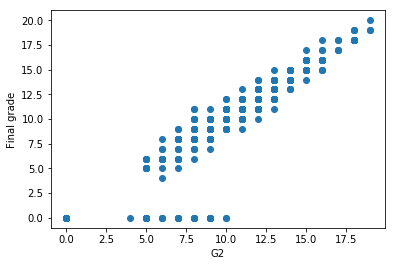

In [11]:
p = 'G2'
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final grade")
pyplot.show()

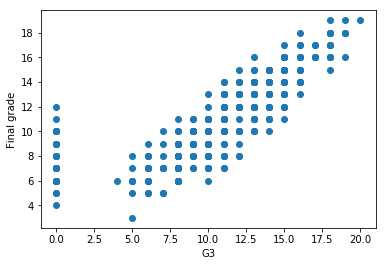

In [14]:
p = 'G3'
pyplot.scatter(data[p], data["G1"])
pyplot.xlabel(p)
pyplot.ylabel("Final grade")
pyplot.show()